In [2]:
import os
from dotenv import load_dotenv

load_dotenv()  

tavily_key = os.getenv("TAVILY_API_KEY")


In [3]:
import os
from dotenv import load_dotenv

load_dotenv()  # loads .env into environment

groq_key = os.getenv("GROQ_API_KEY")
model = "qwen/qwen3-32b"
tavily_key = os.getenv("TAVILY_API_KEY")


In [4]:
print("Groq key loaded:", bool(groq_key))
print("Tavily key loaded:", bool(tavily_key))


Groq key loaded: True
Tavily key loaded: True


In [5]:
import os
from dotenv import load_dotenv

load_dotenv()
print(os.getenv("TAVILY_API_KEY"))


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


In [6]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=5)
print(tool.invoke("latest AI news"))


{'query': 'latest AI news', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates', 'title': 'Latest AI News and AI Breakthroughs that Matter Most: 2026 & 2025', 'content': 'Summary: Apple has officially announced that a completely reimagined, AI-powered version of Siri is set to debut in 2026. This fundamental transformation will', 'score': 0.8245895, 'raw_content': None}, {'url': 'https://www.artificialintelligence-news.com/', 'title': 'AI News | Latest News | Insights Powering AI-Driven Business Growth', 'content': 'AI News delivers the latest updates in artificial intelligence, machine learning, deep learning, enterprise AI, and emerging tech worldwide.', 'score': 0.82082915, 'raw_content': None}, {'url': 'https://www.reuters.com/technology/artificial-intelligence/', 'title': 'AI News | Latest Headlines and Developments | Reuters', 'content': 'Explore the latest artificial intelligence news with Reut

In [7]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")

In [8]:
from langchain_tavily import TavilySearch

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
)

tool.invoke("what is current ai news")

{'query': 'what is current ai news',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
   'title': 'Latest AI News and AI Breakthroughs that Matter Most',
   'content': 'Summary: Apple has officially announced that a completely reimagined, AI-powered version of Siri is set to debut in 2026. This fundamental transformation will',
   'score': 0.70702106,
   'raw_content': None},
  {'url': 'https://www.artificialintelligence-news.com/',
   'title': 'AI News | Latest News | Insights Powering AI-Driven Business ...',
   'content': 'AI News delivers the latest updates in artificial intelligence, machine learning, deep learning, enterprise AI, and emerging tech worldwide.',
   'score': 0.6737291,
   'raw_content': None},
  {'url': 'https://www.wsj.com/tech/ai?gaa_at=eafs&gaa_n=AWEtsqeWzjIbnhave1hdDQnah0p0D34pSmJCgVYcVzMjP1DIp-59xill0Aav&gaa_ts=6987996a&gaa_sig=YZIUGs2gLNyQgI6TO5K6g75DaoaBrrtbXPqFTAUmU

In [9]:
from langchain.tools import tool

@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression :str) -> str :
    """Evaluate mathematic expression"""
    return str(eval(expression))

In [10]:
tool

<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

In [13]:
from langchain_groq import ChatGroq
from langchain.agents import create_agent

model = ChatGroq(model="llama-3.1-8b-instant")

agent = create_agent(
    model=model,
    tools=[tavily_search_tool, calc]
)


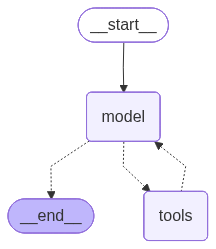

In [17]:
agent

In [15]:
user_input="what is the current ai news for anthropic and then calculate 9 + 6"

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

what is the current ai news for anthropic and then calculate 9 + 6
================================== Ai Message ==================================
Tool Calls:
  tavily_search (v1gkv28s5)
 Call ID: v1gkv28s5
  Args:
    query: anthropic current ai news
  calculator (6cghy9tff)
 Call ID: 6cghy9tff
  Args:
    expression: 9 + 6
================================= Tool Message =================================
Name: calculator

15
================================== Ai Message ==================================

The current AI news for Anthropic is focused on the release of a new version of its AI model, Claude Opus 4.6, designed to carry out financial research and other work-related functions. The new model is said to be able to work on tasks for longer and more reliably, while showing gains related to coding and finance.

The calculation of 9 + 6 is 15.


In [18]:
agent.invoke({"messages": "What is the capital of France?"})

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='6c655f90-59eb-4d61-9ed8-f46ea5de5fb0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wq5xt12br', 'function': {'arguments': '{"query":"capital of France"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 1748, 'total_tokens': 1766, 'completion_time': 0.029584543, 'completion_tokens_details': None, 'prompt_time': 0.13226415, 'prompt_tokens_details': None, 'queue_time': 0.045444169, 'total_time': 0.161848693}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c39a2-e1d2-70d1-a098-b35896a7462a-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'capital of France'}, 'id': 'wq5xt12br', 'type': 'tool_call'}], invalid_tool_call